<a href="https://colab.research.google.com/github/DiwakarBasnet/GPU-mode/blob/main/CUDA/day-10/scharr_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

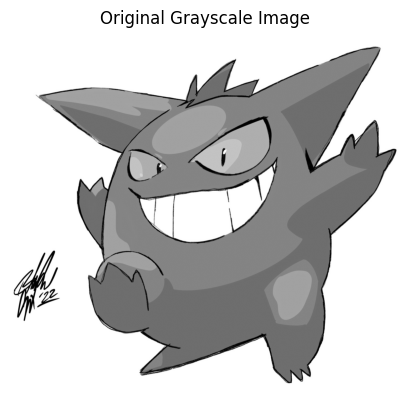

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread("pokemon.jpg", cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

In [2]:
scharr_x = np.array([
    [-3, 0, 3],
    [-10, 0, 10],
    [-3, 0, 3]
])

scharr_y = np.array([
    [-3, -10, -3],
    [0, 0, 0],
    [3, 10, 3]
])

In [3]:
height, width = image.shape
print(f"Height: {height}, Width: {width}")

Height: 1953, Width: 2057


In [4]:
# Since our filter size is 3, filter radius will be 1
padded_image = np.pad(image, pad_width=1, mode="constant")
gradient_x = np.zeros((height, width))
gradient_y = np.zeros((height, width))
gradient_magnitude = np.zeros((height, width))

In [5]:
for i in range(0, height):
  for j in range(0, width):
    region = padded_image[i:i+3, j:j+3]
    gx = np.sum(region * scharr_x)
    gy = np.sum(region * scharr_y)

    gradient_x[i, j] = gx
    gradient_y[i, j] = gy
    gradient_magnitude[i, j] = np.sqrt(gx**2 + gy**2)

gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)

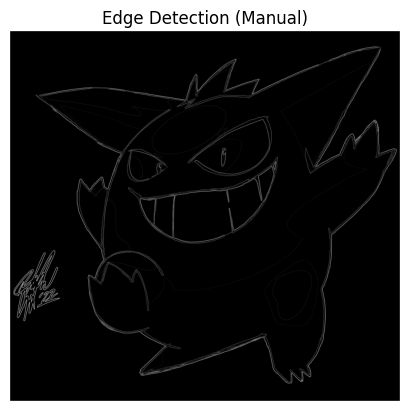

In [6]:
plt.imshow(gradient_magnitude, cmap="gray")
plt.title("Edge Detection (Manual)")
plt.axis("off")
plt.show()

In [7]:
scharr_x_oc = cv2.filter2D(image, -1, scharr_x)
scharr_y_oc = cv2.filter2D(image, -1, scharr_y)

gradient_magnitude = np.sqrt(scharr_x_oc**2 + scharr_y_oc**2)
gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)

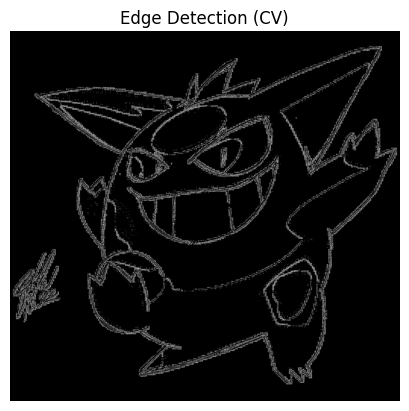

In [8]:
plt.imshow(gradient_magnitude, cmap="gray")
plt.title("Edge Detection (CV)")
plt.axis("off")
plt.show()